# Kickstarter Analysis
### Sam B, Ben S, Eliza-Eve L, Vera W & MP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Formatting
from matplotlib.ticker import FormatStrFormatter
kick_colors = 'YlGnBu'
list_months = ("Jan","Feb","Mar","Apr","May","Jun",
               "Jul","Aug","Sep","Oct","Nov","Dec")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Our dataset uses the 2018 Kickstarter data from Kaggle
<a href="https://www.kaggle.com/kemical/kickstarter-projects/downloads/ks-projects-201801.csv/7">CLICK HERE TO DOWNLOAD .CSV</a>
<ol>
    <li> After downloading the file please unzip it.
    <li> Following the decompression, rename the file as "kickstarter.csv"
    <li> Make sure the file is in the same directory as your iPython notebook
</ol>

#### Importing the dataset and converting dates to datetime

In [2]:
# I saved the .csv in the same folder as my .IPYNB, 
#  Reading the CSV into iPython
data = pd.read_csv("kickstarter.csv")

In [3]:
# Save the imported csv data as new DataFrame, 
# we can always call this later if we want to start from scratch
df_data = pd.DataFrame(data)

# Start working with a main DataFrame
# Convert date columns to datetime format, have Pandas 'infer' format
df_Kickstarter = df_data
df_Kickstarter["deadline"] = pd.to_datetime(df_data["deadline"], infer_datetime_format=True)
df_Kickstarter["launched"] = pd.to_datetime(df_data["launched"], infer_datetime_format=True)

# Drop na's and run it inplace
df_Kickstarter.dropna(how='any', subset=["name","usd pledged"], inplace=True)

#### 1: The most popular and successful months Kickstarters are launched

In [4]:
# Resample to discover amount pledged per month
df_pledgedMonthly = df_Kickstarter.groupby(by='deadline').sum().resample('1M').sum()
monthlyPledges = df_pledgedMonthly["pledged"]['2011':'12/31/2017']

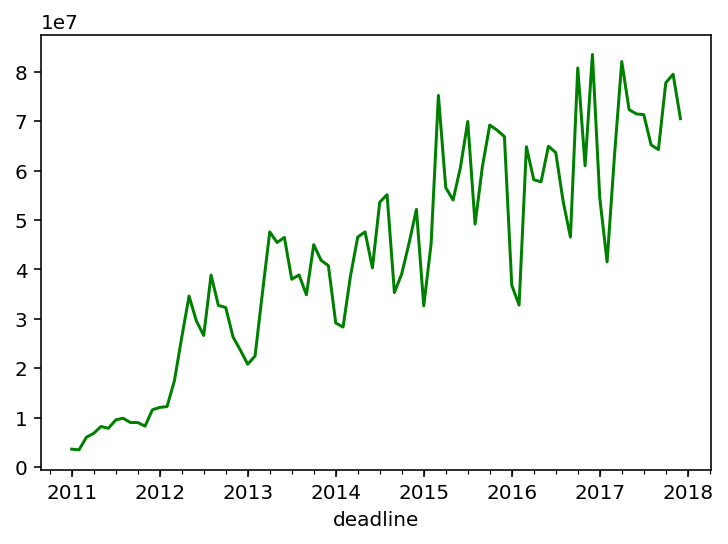

In [5]:
# Simple lineplot, graphing from 2011 end of 2017
monthlyPledges.plot(kind='line', color='green')

/Users/MP/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/MP/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,u'Amount Pledged')

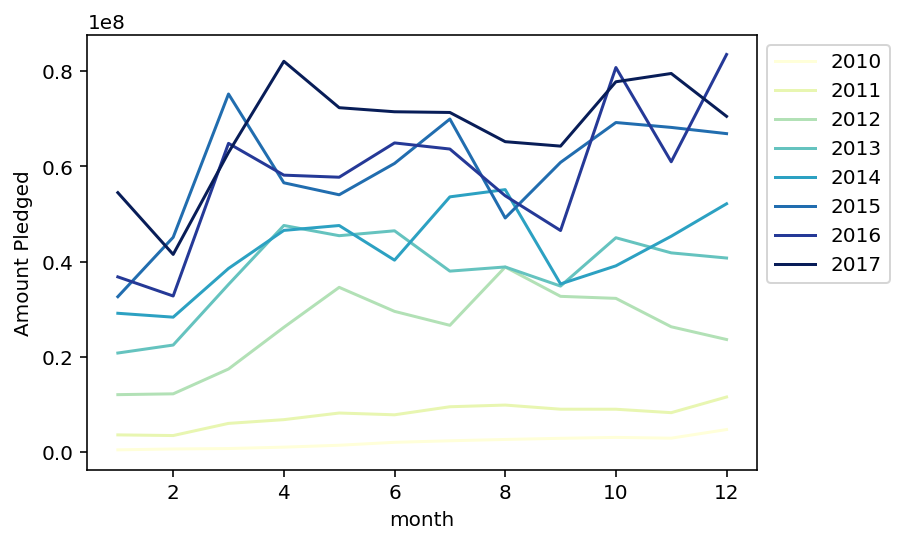

In [6]:
# Create DataFrame and lets look at seaonality
monthlyPledgesYear = df_Kickstarter[["deadline","pledged","state"]]

# Create columns for year and month
monthlyPledgesYear["year"] = monthlyPledgesYear["deadline"].dt.year
monthlyPledgesYear["month"] = monthlyPledgesYear["deadline"].dt.month

# Create Pivot Table
pivot_monthlyPledge = pd.pivot_table(data=monthlyPledgesYear,
                                    index='month',
                                    columns='year',
                                    values='pledged',
                                    aggfunc='sum')


# Drop 2009 and 2018 because of incomplete data
pivot_monthlyPledge.drop(axis=1,labels=[2009,2018], inplace=True)

# Plot each year
a = pivot_monthlyPledge.plot(kind='line', cmap=kick_colors)
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('Amount Pledged')

Text(0,0.5,u'Amount Pledged')

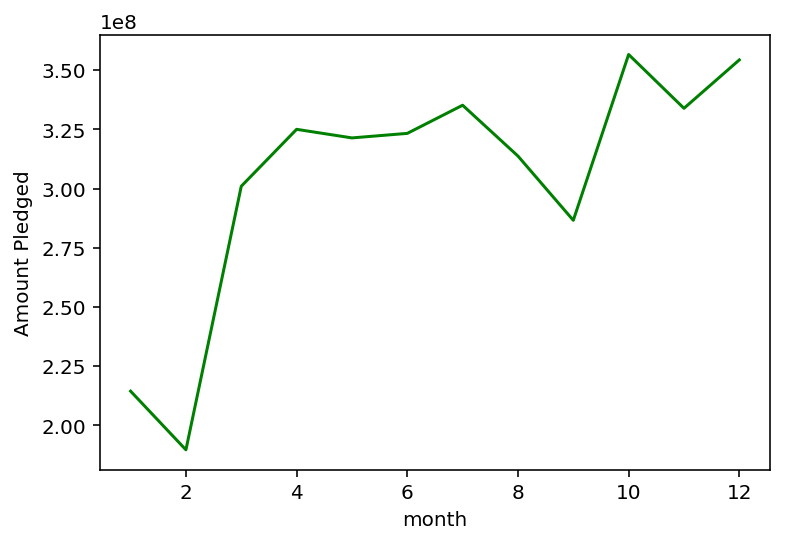

In [7]:
# Plot total by month
sum_monthly = monthlyPledgesYear.groupby(by='month').sum()
a = sum_monthly["pledged"].plot(kind="line", color="green")
plt.ylabel("Amount Pledged")

It could be a function of the rapid growth, but the amount of funding accelerates towards the end of the year, but has a rapid decrease from December to January.

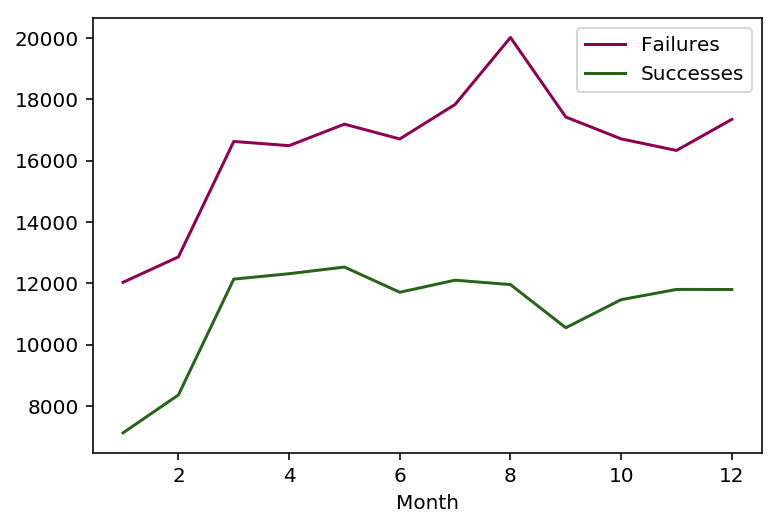

In [8]:
# Finding the months with the most successful launches
monthly_succcesses = monthlyPledgesYear[monthlyPledgesYear["state"] == 'successful'].groupby('month').count()
monthly_failures = monthlyPledgesYear[monthlyPledgesYear["state"] == 'failed'].groupby('month').count()
plot_stateMonth = monthly_failures.drop(columns=["deadline","pledged","year"])
plot_stateMonth.columns = ["Failures"]
plot_stateMonth["Successes"] = monthly_succcesses["state"]
plot_stateMonth.index.name = "Month"
plot_stateMonth.plot(kind="line", cmap='PiYG')

#### 2: Categories and their funding targets

In [9]:
# Create a separate DataFrame for this analysis
df_categories = df_Kickstarter
# How successful are most kickstarters?
df_categories['ratio'] = df_categories['pledged'].div(df_categories['goal'])
# Drop meaningless kickstarters (less than $500 goal)
df_categories = df_categories.drop(df_categories[df_categories.goal < 500].index)
goal_mean = df_categories[df_categories.state == 'successful'].goal.mean()
print("Mean goal of successful projects is: {0:,.2f}".format(goal_mean))

Mean goal of successful projects is: 11,070.93


Text(0.5,0,u'Main Category')

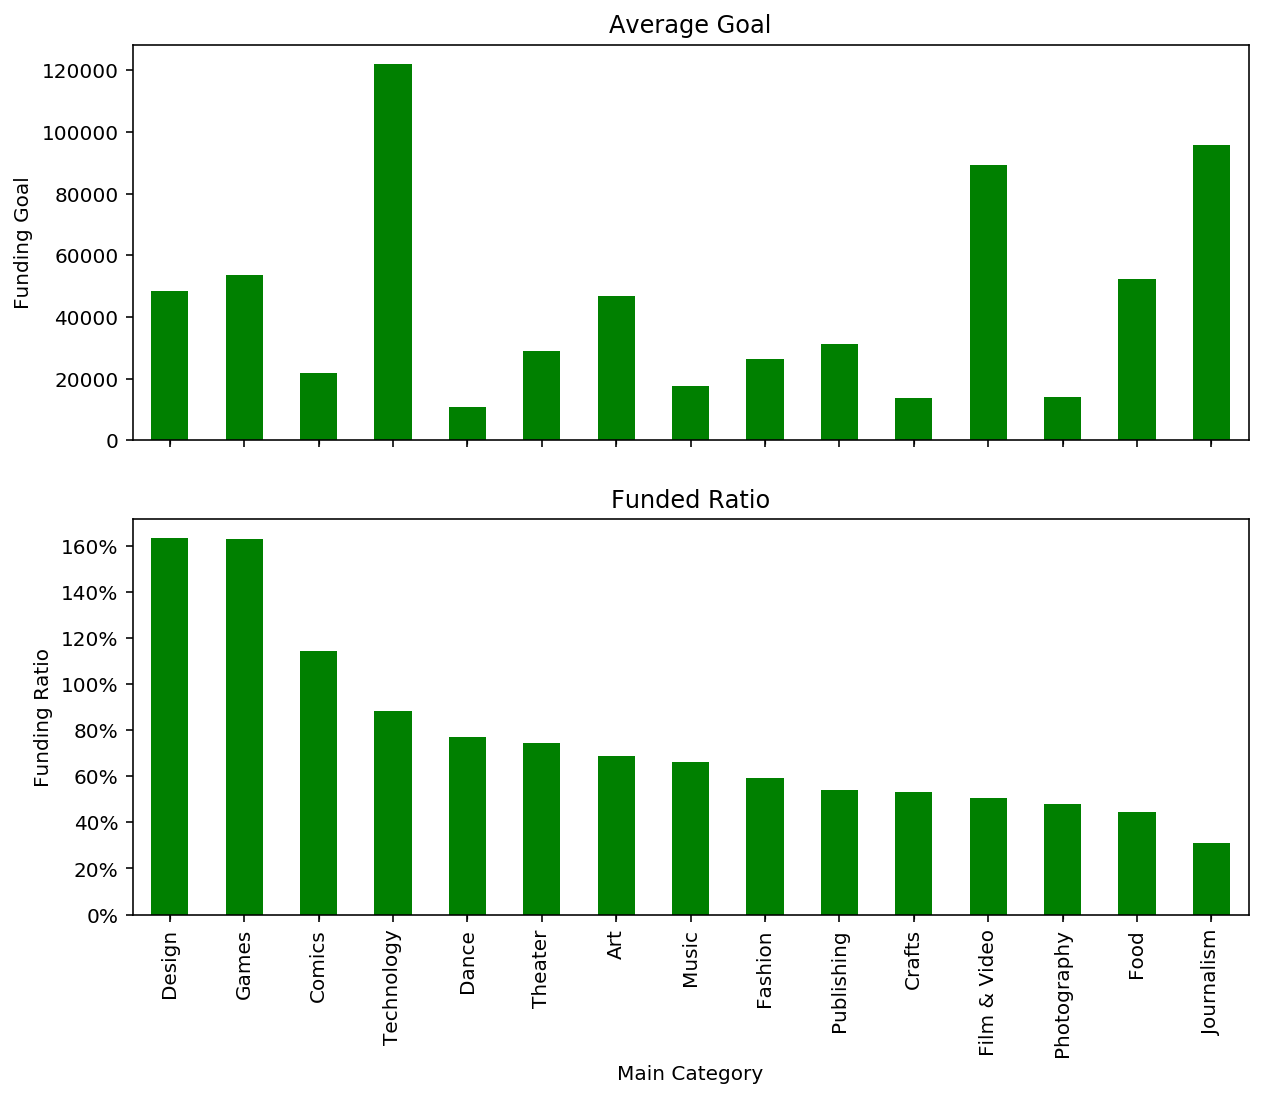

In [10]:
# Plot the goal of the different categories
df_categoryGoal = df_categories.groupby(by="main_category").mean()[["goal","ratio"]].sort_values(by="ratio", ascending=False)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))

df_categoryGoal["goal"].plot(kind="bar", 
                             ax=ax1, 
                             color='green', 
                             title="Average Goal")
df_categoryGoal["ratio"].plot(kind="bar", 
                              ax=ax2, 
                              logy=False, 
                              color='green', 
                              title="Funded Ratio")
# format ratio labels
ylabels = ["{:.0%}".format(label) for label in ax2.get_yticks()]
ax2.set_yticklabels(ylabels)
ax1.set_ylabel("Funding Goal")
ax2.set_ylabel("Funding Ratio")
plt.xlabel("Main Category")

In the charts above, we find it very interesting how some projects often meet there funding goals while others, like food and journalism do not.

<font color='red'>Please note running the following cell can be time instensive
and will result in a number of subplots</font>

In [11]:
# All of the funding ratios for each sub-category (DOUBLE CLICK TO ZOOM)
fig_ratio = df_categories['ratio'].hist(by=df_categories['category'],xlabelsize = 10, bins = 100, figsize=(100,100))
for ax in fig_ratio.flatten():
    ax.set_xlabel("Ratio of Pledged/Goal")
    ax.set_ylabel("Projects")

In [34]:
df_Kickstarter.columns

Index([u'ID', u'name', u'category', u'main_category', u'currency', u'deadline',
       u'goal', u'launched', u'pledged', u'state', u'backers', u'country',
       u'usd pledged', u'usd_pledged_real', u'usd_goal_real', u'ratio',
       u'tDelta'],
      dtype='object')

/Users/MP/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,u'Number of Projects')

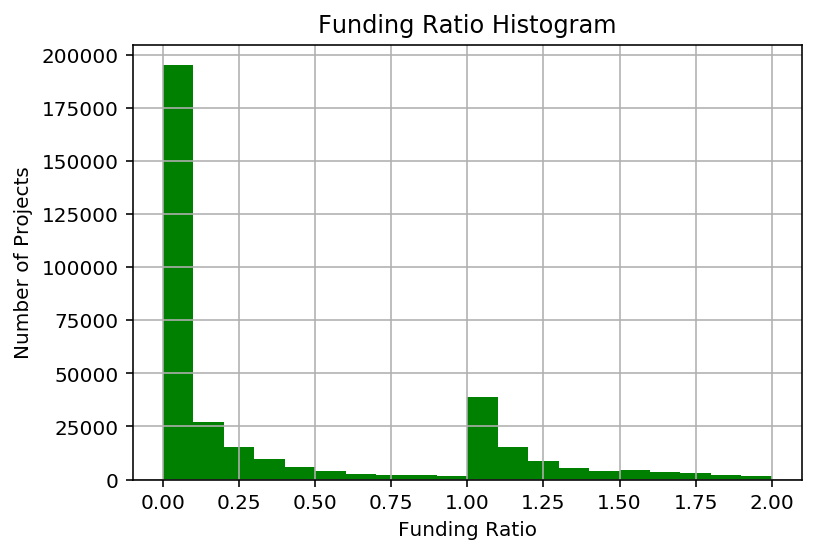

In [91]:
df_fundingRatio = df_Kickstarter[["usd pledged","goal"]]
df_fundingRatio["ratio"] = df_fundingRatio["usd pledged"] / df_fundingRatio["goal"]

# Drop outliers over 2 Std Dev's from mean
#df_fundingRatio = df_fundingRatio[ \
#                                  np.abs(df_fundingRatio["ratio"]-df_fundingRatio["ratio"].mean()) <= 2 * df_fundingRatio["ratio"].std()]
# Drop Ratios over 2

ratio_cut = df_fundingRatio[df_fundingRatio[['ratio']] < 2]

#df_fundingRatio['ratio'] = df_fundingRatio[(df_fundingRatio['ratio'] <= 2)]
#df_fundingRatio.hist(color='green', bins=20)
ratio_cut['ratio'].hist(bins=20, color='green')
plt.title('Funding Ratio Histogram')
plt.xlabel('Funding Ratio')
plt.ylabel('Number of Projects')

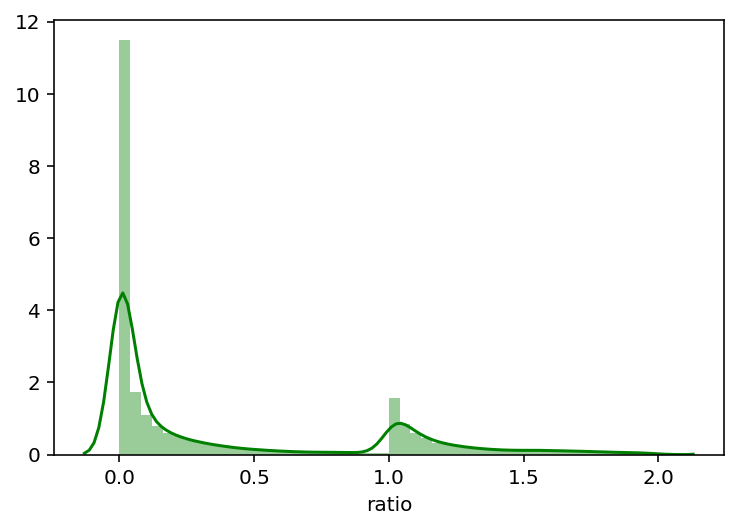

In [96]:
sns.distplot(ratio_cut['ratio'].dropna(how='any'), color='green')

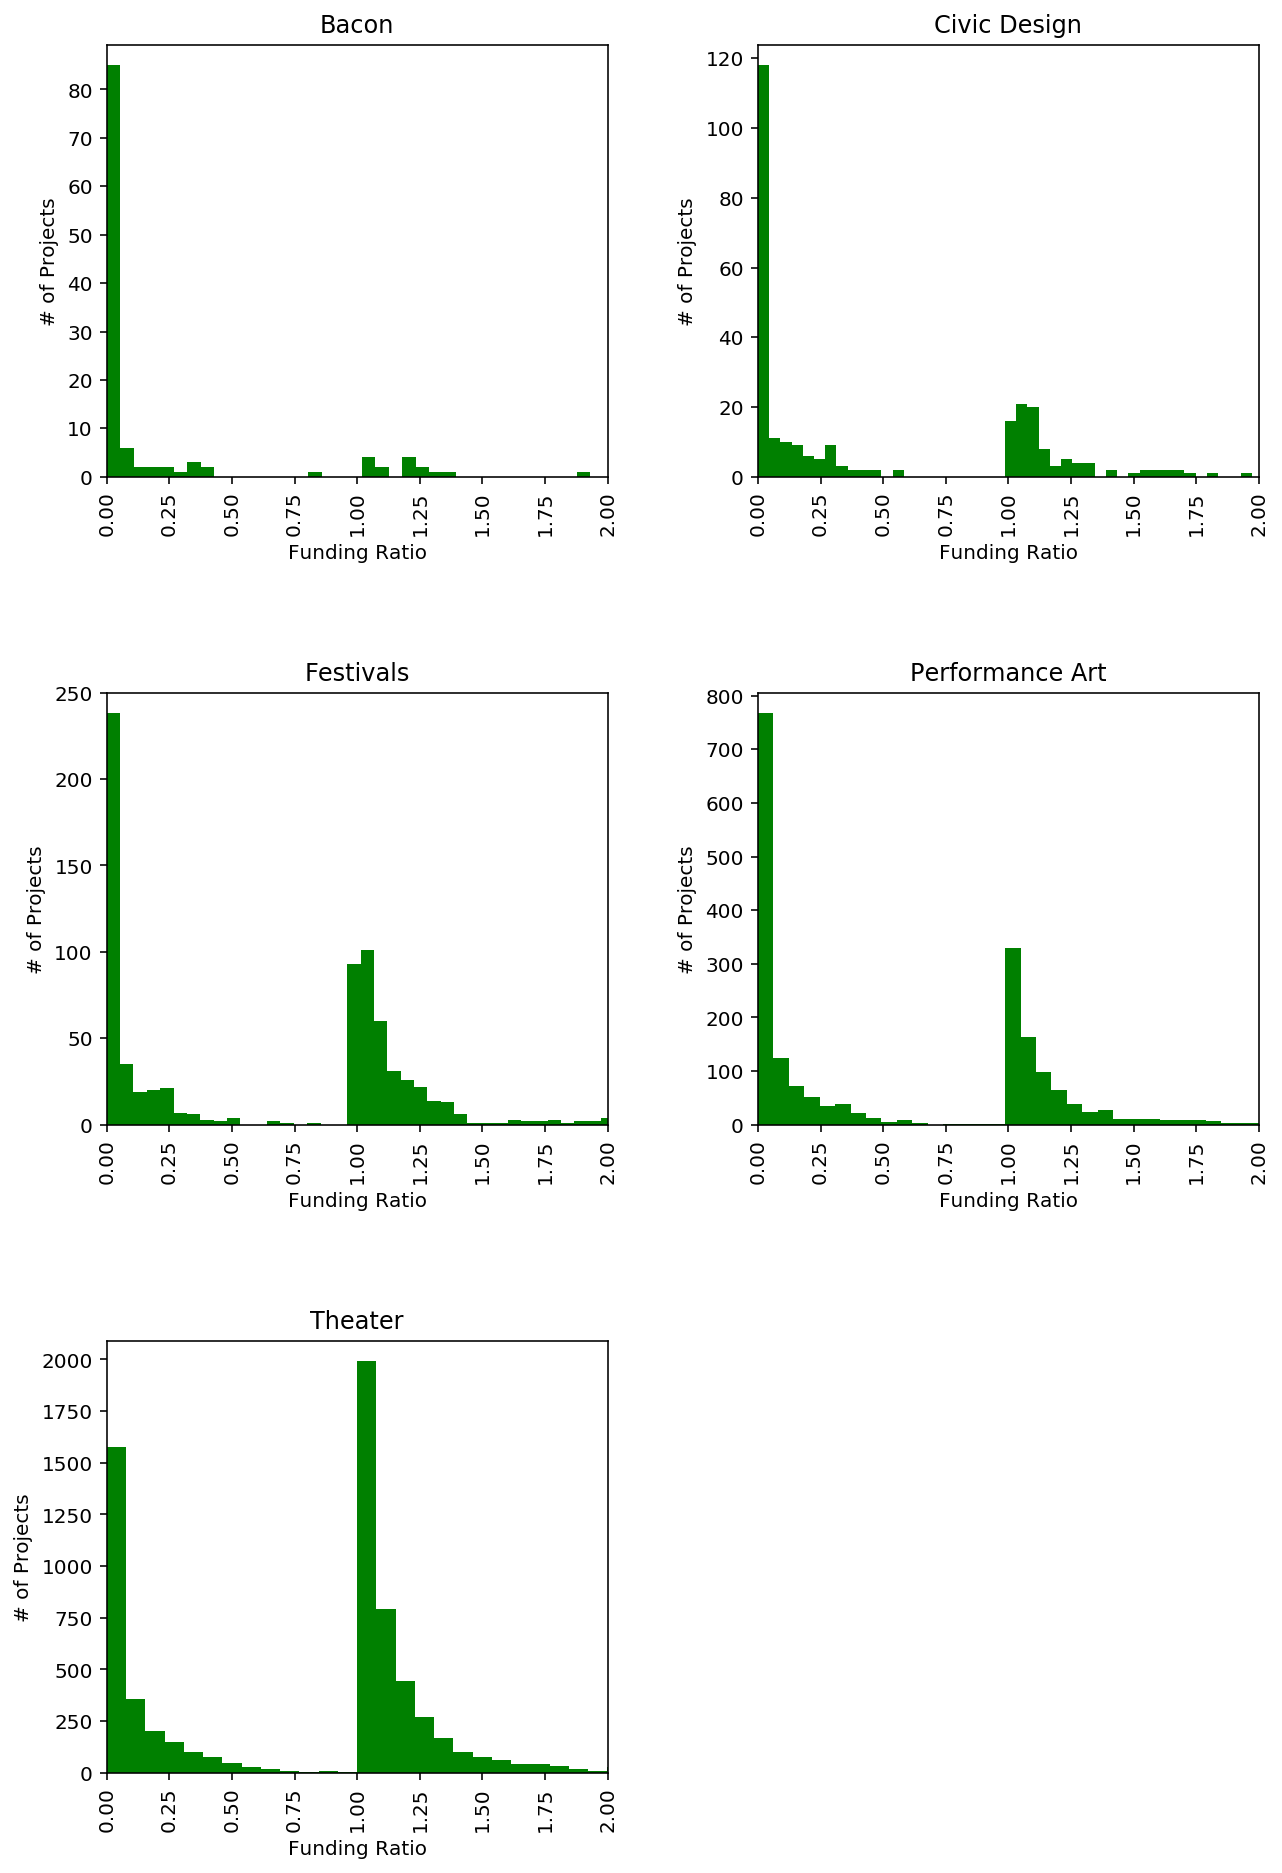

In [12]:
# Good examples of projects that cluster around 0 and 1 are: 
# Bacon, Civic Design, Festivals, Performance Art and Theater
list_keyratios = ["Bacon", "Civic Design", "Festivals", "Performance Art", "Theater"]
ratio_examples = df_categories[df_categories["category"].isin(list_keyratios)]
ratio_examples = ratio_examples[["category","ratio"]]
ratio_plots = ratio_examples.hist(by='category',
                    bins=100, 
                    figsize=(10,16),
                    color='green')
for ax in ratio_plots.flatten():
    ax.set_xlim(0,2)
    ax.set_ylabel("# of Projects")
    ax.set_xlabel("Funding Ratio")

Note how in the charts above funding ratios congreate either around 0 or 1.

#### Further analysis of the goals by category, but now a focus on geography

In [13]:
df_geos = df_Kickstarter
geos_plot = df_geos.groupby(by='country').count().sort_values(by="ID", ascending=False)[1:10]

As you can see above the US has way more projects than any other country.

Text(0.5,0,u'Country')

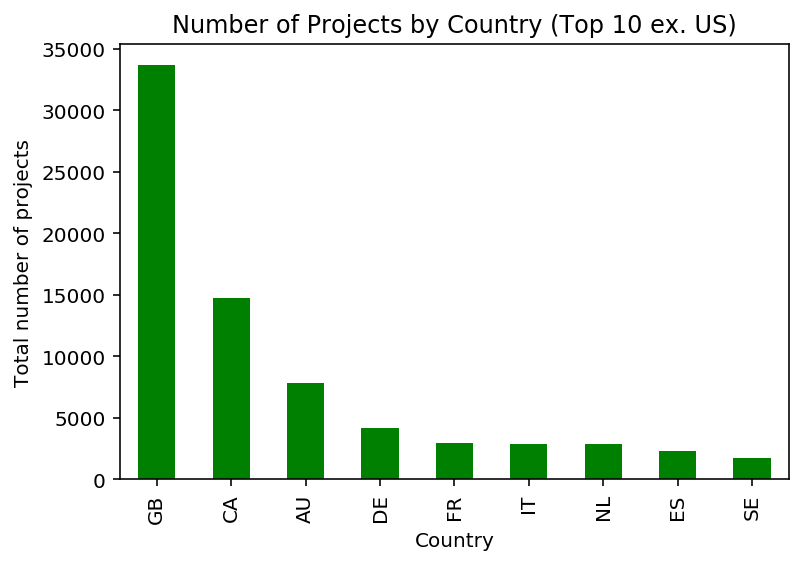

In [14]:
geos_plot["ID"].plot(kind='bar', color="green", title="Number of Projects by Country (Top 10 ex. US)")
plt.ylabel('Total number of projects')
plt.xlabel('Country')

Outside the US, Great Britain is the biggest geography for Kickstarter

In [15]:
df_Kickstarter.columns

Index([u'ID', u'name', u'category', u'main_category', u'currency', u'deadline',
       u'goal', u'launched', u'pledged', u'state', u'backers', u'country',
       u'usd pledged', u'usd_pledged_real', u'usd_goal_real', u'ratio'],
      dtype='object')

Text(0.5,0,u'Country')

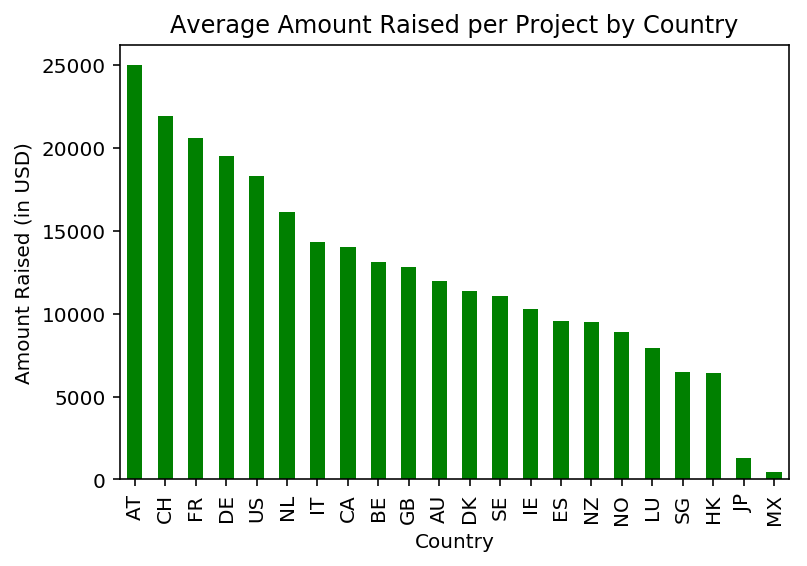

In [16]:
# Slice by total raised
df_perProject = df_geos[["state","usd pledged","country"]]
# Keep only successful projects and group
df_projectCount = df_perProject[df_perProject["state"] == "successful"].groupby(by="country").count()
df_projectCount.columns = ["Number of Projects", "mask"]
df_projectSum = df_perProject[df_perProject["state"] == "successful"].groupby(by="country").sum()
df_geoMerge = df_projectCount.join(df_projectSum, how='inner')
df_geoMerge["Raise per Project"] = df_geoMerge["usd pledged"] / df_geoMerge["Number of Projects"]
df_geoMerge.drop(columns=["mask"], inplace=True)
df_geoMerge.columns = ["Number of Projects", "Pledged", "Raise per Project"]
df_geoMerge["Raise per Project"].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Average Amount Raised per Project by Country")
plt.ylabel("Amount Raised (in USD)")
plt.xlabel("Country")

In [17]:
df_Kickstarter.columns

Index([u'ID', u'name', u'category', u'main_category', u'currency', u'deadline',
       u'goal', u'launched', u'pledged', u'state', u'backers', u'country',
       u'usd pledged', u'usd_pledged_real', u'usd_goal_real', u'ratio'],
      dtype='object')

Text(0.5,0,u'Country')

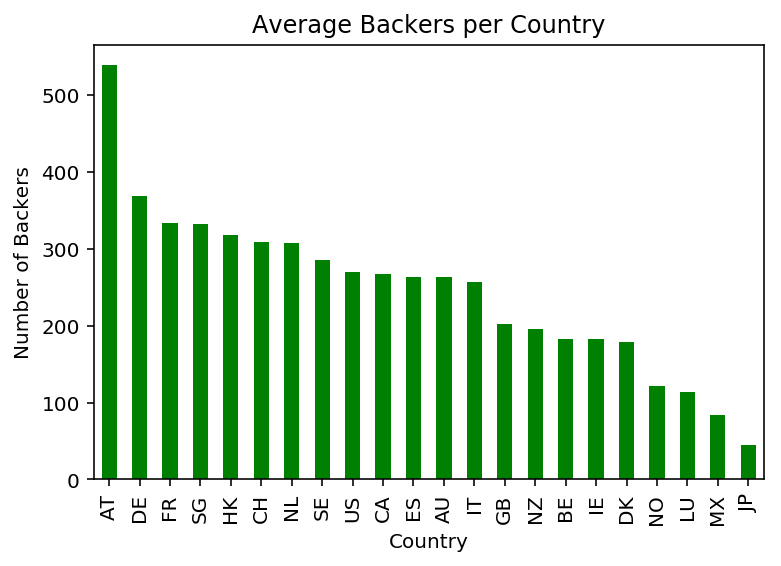

In [18]:
# Slice by total raised
df_backersGeo = df_geos[["state","backers","country"]]
# Keep only successful projects and group
df_backersCount = df_backersGeo[df_backersGeo["state"] == "successful"].groupby(by="country").count()
df_backersCount.columns = ["Number of Backers", "mask"]
df_backersSum = df_backersGeo[df_backersGeo["state"] == "successful"].groupby(by="country").sum()
df_geoMerge = df_backersCount.join(df_backersSum, how='inner')
df_geoMerge["Backers per Project"] = df_geoMerge["backers"] / df_geoMerge["Number of Backers"]
df_geoMerge.drop(columns=["mask"], inplace=True)
df_geoMerge.columns = ["Number of Backers", "Pledged", "Backers per Project"]
df_geoMerge["Backers per Project"].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Average Backers per Country")
plt.ylabel("Number of Backers")
plt.xlabel("Country")

<font color='red' size=12> Hey Sam, this is where MP is up to</font>

#### A look at the success rates of different categories

Text(0,0.5,u'Number of Projects')

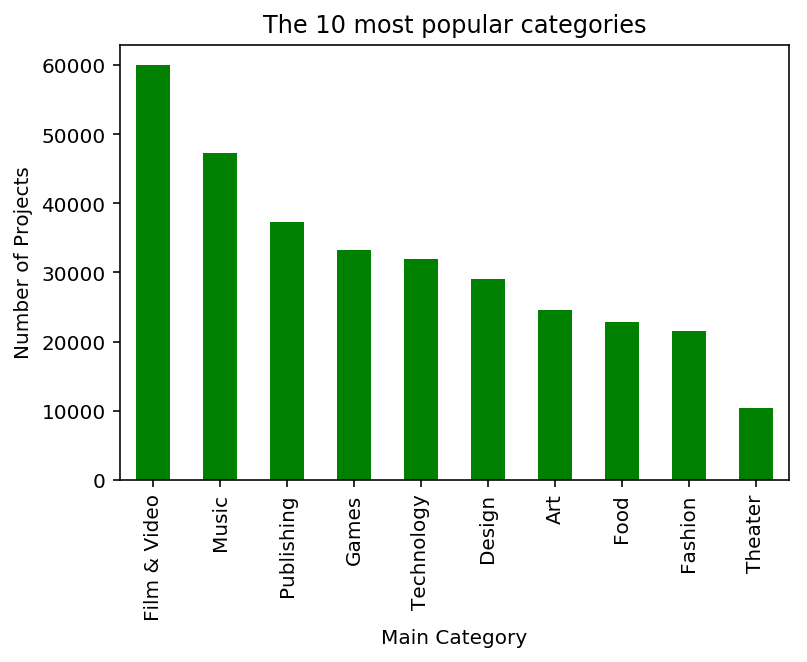

In [19]:
popular = df_categories["main_category"].value_counts().sort_values(ascending=False)[0:10]
popular.plot(kind='bar', 
             color='green', 
             title="The 10 most popular categories")
plt.xlabel("Main Category")
plt.ylabel("Number of Projects")

Text(0.5,1,u'Success Rate for Main Categories')

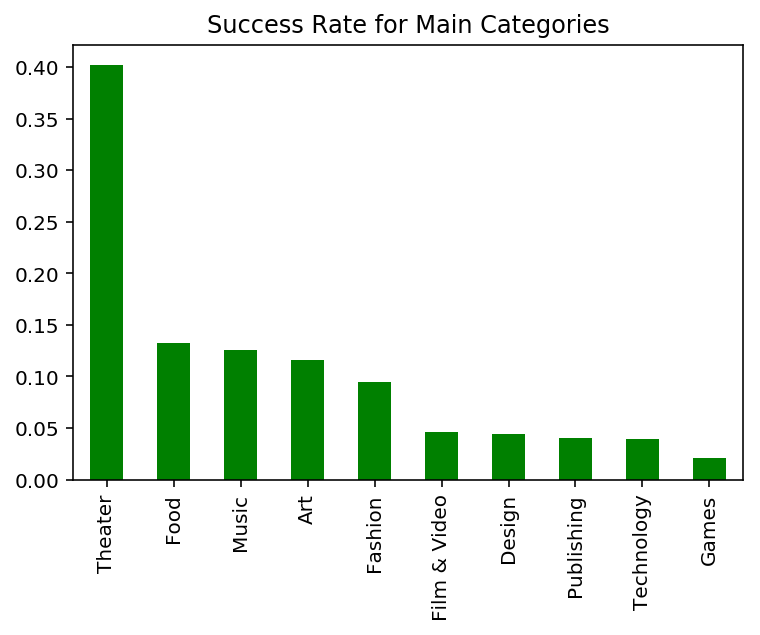

In [20]:
# Get the number of successful projects for each of the top categories
# First select only top categories
popular_success = df_categories[df_categories["main_category"].isin(popular.index)]
# Then only successful categories
popular_success = popular_success[popular_success["state"] == "successful"].groupby(by='category').count()
# Join the two
popular_merge = pd.DataFrame(popular).join(popular_success[["ID","state"]], how='inner')
# Calculate percent success rate
popular_merge["state"] = popular_merge["ID"] / popular_merge["main_category"]
popular_merge.columns = ["Num. of Projects", "Successes", "Success Rate"]
popular_merge["Success Rate"].sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Success Rate for Main Categories")

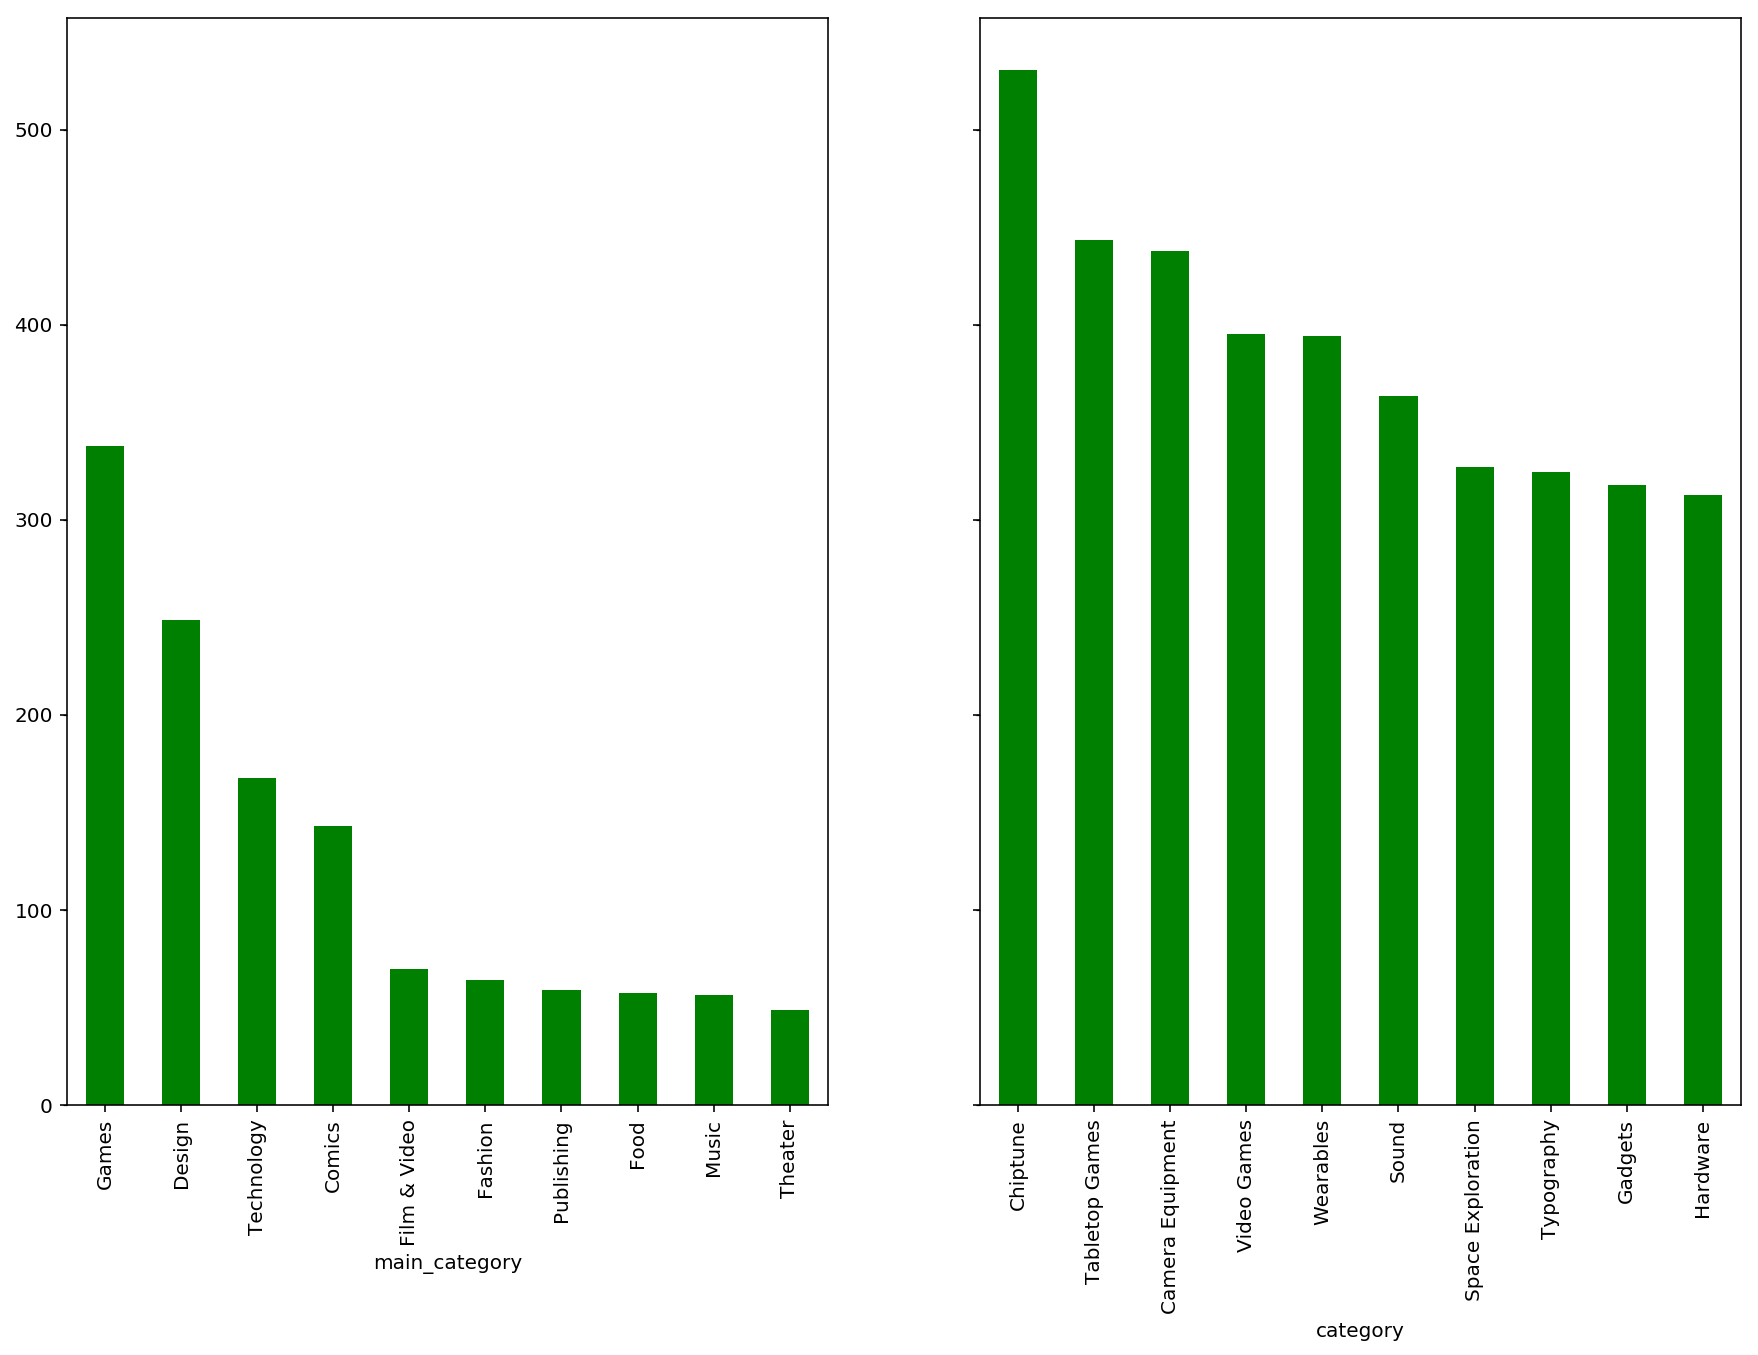

In [21]:
# Looking at the mean number of backers for both main and sub category
df_categoryBackers = df_categories.groupby(by='category').mean().sort_values(by="backers", ascending=False)[0:10]
df_mainCatBackers = df_categories.groupby(by='main_category').mean().sort_values(by="backers", ascending=False)[0:10]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,10))
df_mainCatBackers["backers"].plot(kind='bar', color='green', ax=ax1)
df_categoryBackers["backers"].plot(kind='bar', color='green', ax=ax2)

#### Analysis of time of fundraising period

In [22]:
# Create new DataFrame for this analysis, don't alter base frame
df_fundTime = df_Kickstarter

# drop NA's, keept it inplace slice
df_fundTime.dropna(how='any', inplace=True)

# Create a column that will handle timedeltas
df_fundTime["tDelta"] = (df_fundTime["deadline"] - df_fundTime["launched"]).dt.days

# Let's only stick to Kickstarters that are less than 2 years for funding
df_fundTime = df_fundTime[df_fundTime['tDelta'] < (365 * 2)]

Text(0.5,1,u'Most common is in the 20-40 day range')

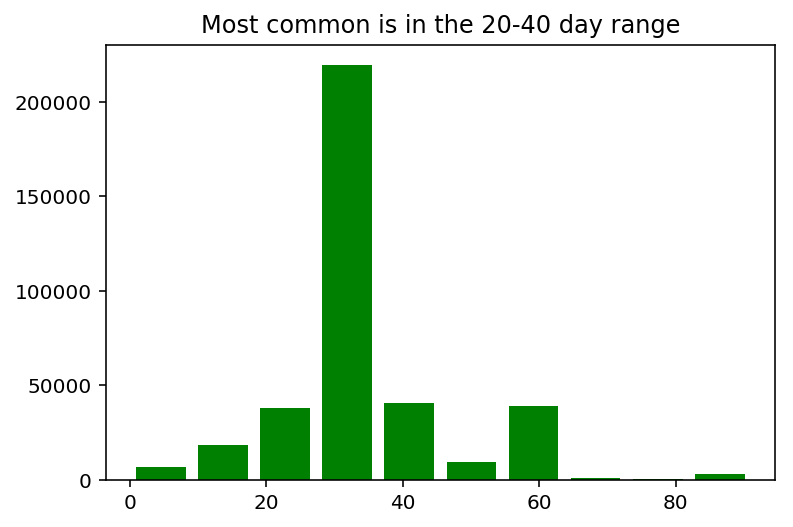

In [23]:
# Historgram
plt.hist(df_fundTime['tDelta'], align='mid', rwidth=0.8, color='green')
plt.title("Most common is in the 20-40 day range")

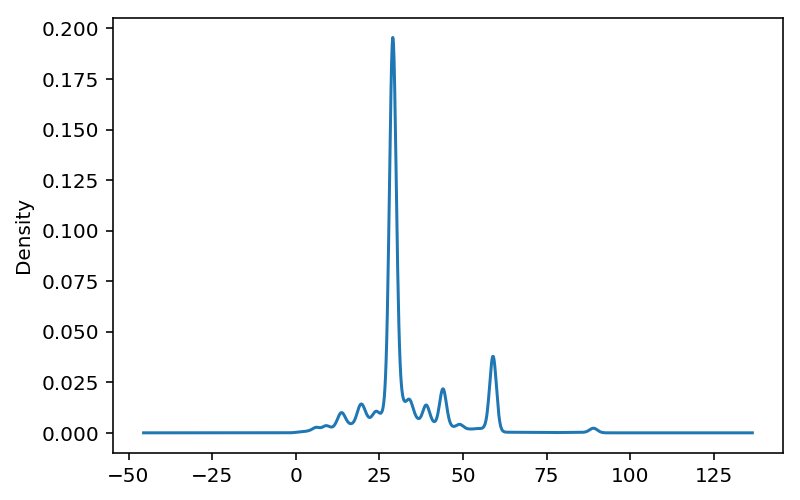

In [24]:
df_fundTime['tDelta'].plot(kind='kde')

In [25]:
# In the 20-40 Day Range, lets look at how may are sucessful vs. the rest
df_inFundRange = df_fundTime[(df_fundTime['tDelta']>=20) & (df_fundTime['tDelta']<=40)]
df_outFundRange = df_fundTime[(df_fundTime['tDelta']<20) | (df_fundTime['tDelta']>40)]

# Group by the state
df_inFundGroup = df_inFundRange.groupby(by="state").count()["ID"]
df_outFundGroup = df_outFundRange.groupby(by="state").count()["ID"]

# Combine
df_fundRangeSuccess = pd.DataFrame(df_inFundGroup)
df_fundRangeSuccess["Outside"] = df_outFundGroup
df_fundRangeSuccess.columns = ["20to40", "Outside"]

Text(-0.3,0.4,u'There seems to be a slightly higher rate \nof success by funding in the 20-40 day range')

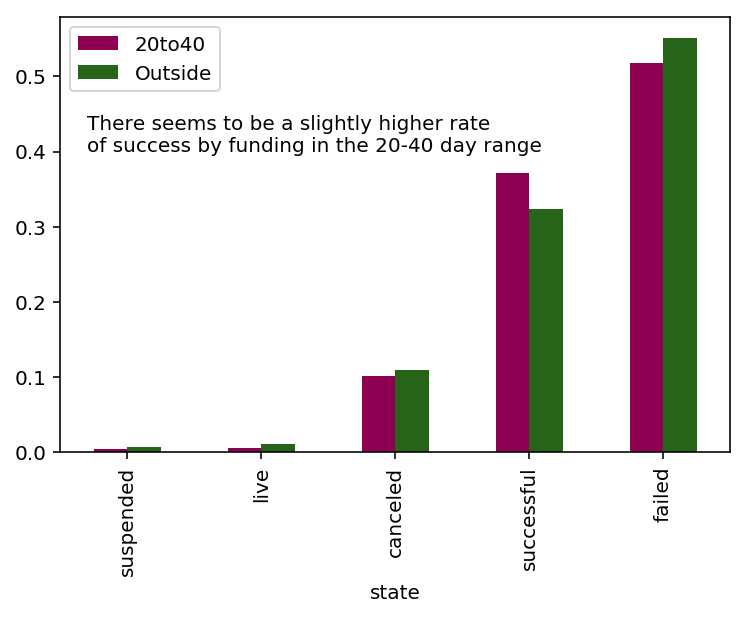

In [26]:
# Normalize the Data
df_SucessNorm = df_fundRangeSuccess
df_SucessNorm["20to40"] = df_fundRangeSuccess["20to40"] / df_fundRangeSuccess["20to40"].sum()
df_SucessNorm["Outside"] = df_fundRangeSuccess["Outside"] / df_fundRangeSuccess["Outside"].sum()
df_SucessNorm.sort_values(by="20to40").plot(kind='bar', cmap="PiYG")
plt.annotate("There seems to be a slightly higher rate \n" \
             "of success by funding in the 20-40 day range",
             xy=(2,0.4),
             xytext=(-0.3,0.4))

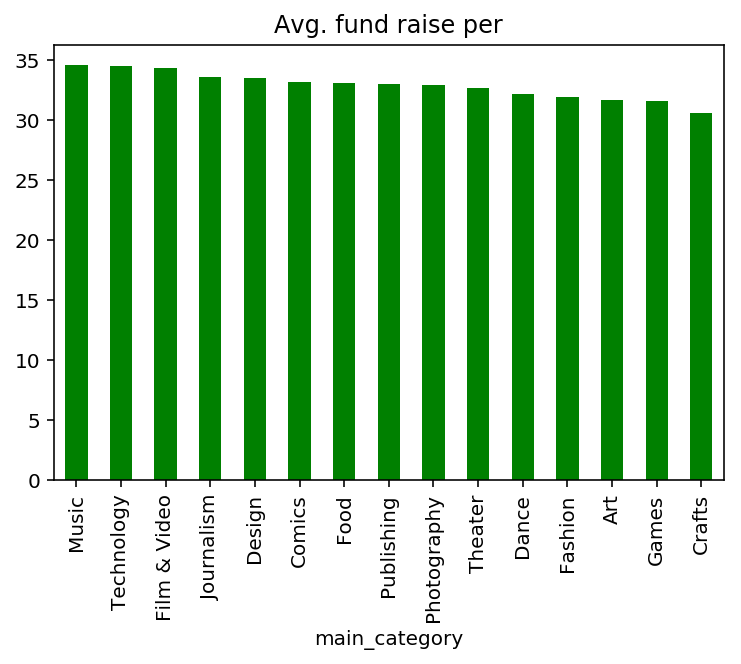

In [27]:
df_fundTime.groupby(by="main_category")["tDelta"].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                           color='green',
                                                                                           title="Avg. fund raise per")

(0, 55)

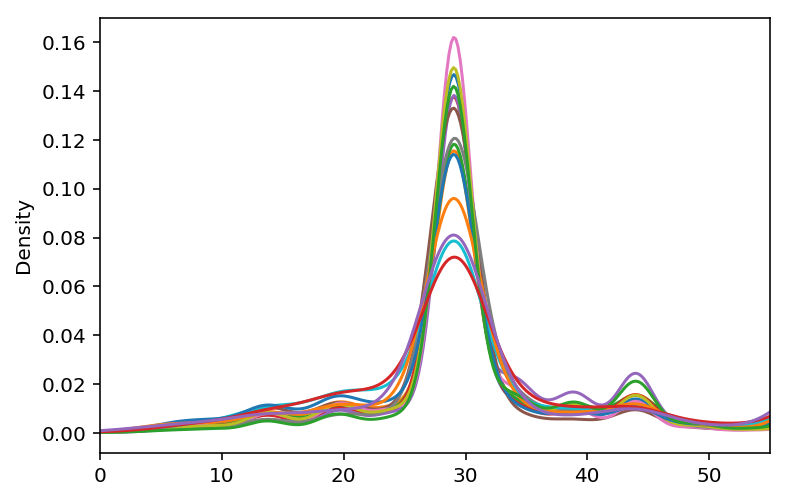

In [28]:
# KDE by categories
cats = df_fundTime['main_category'].unique()
for cat in cats:
    df_fundTime['tDelta'][df_fundTime['main_category'] == cat].plot.kde()
plt.xlim(0,55)

You can see that the sweet spot for Kickstarter projects is about 30 days

In [29]:
# Make bins and then look at the percent of success in each bin
bins_tDelts = pd.cut(df_fundTime['tDelta'], bins=[0,10,20,30,40,50,1000], labels=["0-10","10-20","20-30",
                                                                                  "30-40","40-50","50+"])
state = df_fundTime.groupby(by=[bins_tDelts, "state"]).count()

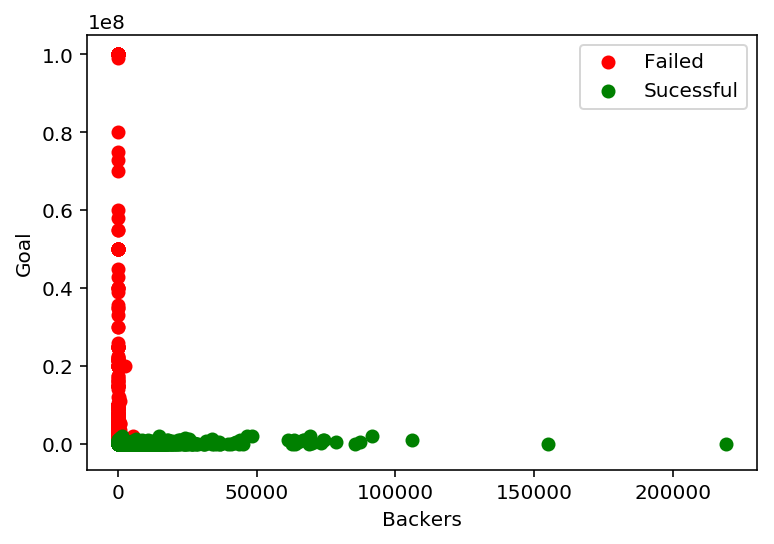

In [30]:
# FOR ELIZA-EVE
df_EE = df_fundTime[(df_fundTime["state"] == "successful") | (df_fundTime["state"] == "failed")]
fail_back = df_EE["backers"][df_EE["state"] == "failed"]
fail_goal = df_EE["goal"][df_EE["state"] == "failed"]
succ_back = df_EE["backers"][df_EE["state"] == "successful"]
succ_goal = df_EE["goal"][df_EE["state"] == "successful"]

plt.scatter(x=fail_back, y=fail_goal, color='red', label="Failed")
plt.scatter(x=succ_back, y=succ_goal, color='green', label="Sucessful")
plt.xlabel("Backers")
plt.ylabel("Goal")
plt.legend(loc='best', )

In [31]:
mp_pivot_total = pd.pivot_table(df_Kickstarter,
                     index=['country'],
                     columns='main_category',
                     values='ID',
                     aggfunc='count',
                     fill_value=0)
mp_pivot_total.drop(labels=["BE","JP","CH","SG","HK","LU","NO"], inplace=True)
mp_pivot_total.sort_index(inplace=True)

In [32]:
mp_pivot_succ = pd.pivot_table(df_Kickstarter[df_Kickstarter['state'] == 'successful'],
                              index='country',
                              columns='main_category',
                              values='ID',
                              aggfunc='count',
                              fill_value=0)
mp_pivot_succ.drop(labels=["BE","JP","CH","SG","HK","LU","NO"], inplace=True)
mp_pivot_succ.sort_index(inplace=True)

Text(0.5,1,u'Success Rate by Category and Country')

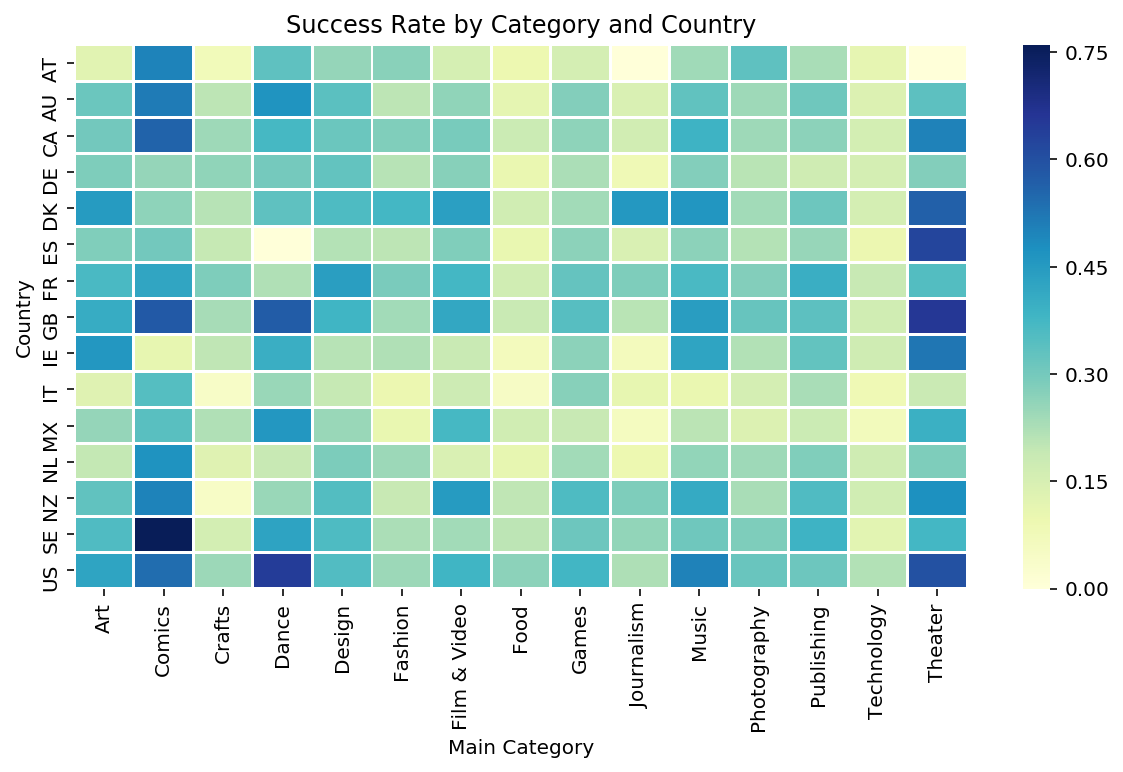

In [33]:
fig, ax = plt.subplots(figsize=(10,5))  
heatmap = mp_pivot_succ / mp_pivot_total
sns.heatmap(heatmap, cmap=kick_colors, linewidths=1, color='red')
plt.ylabel("Country")
plt.xlabel("Main Category")
plt.title("Success Rate by Category and Country")